<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/14_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liczba zwykłych Pokémonów (0): 735
Liczba legendarnych Pokémonów (1): 65
Accuracy: 0.9375
Precision: 0.5000
Recall: 0.2000
F1-score: 0.2857

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.50      0.20      0.29        10

    accuracy                           0.94       160
   macro avg       0.72      0.59      0.63       160
weighted avg       0.92      0.94      0.92       160



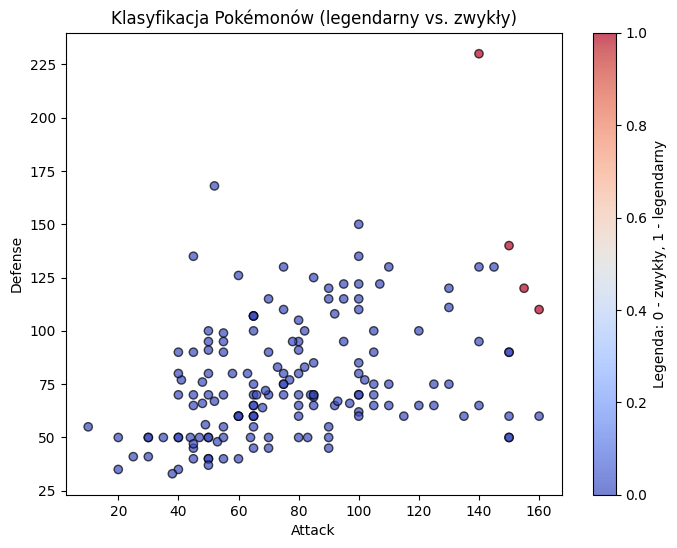

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Wczytanie danych
df = pd.read_csv('Pokemon.csv')

# Wybór cech i etykiet
X = df[['Attack', 'Defense']]
Y = df['Legendary'].astype(int)  # Konwersja wartości logicznych na liczby
print(f"Liczba zwykłych Pokémonów (0): {Y.value_counts()[0]}")
print(f"Liczba legendarnych Pokémonów (1): {Y.value_counts()[1]}")
# Podział na zbiór uczący i testowy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Tworzenie i trenowanie modelu
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predykcja na zbiorze testowym
Y_pred = model.predict(X_test)

# Ocena skuteczności
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Wyświetlenie metryk
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('\nClassification Report:\n', classification_report(Y_test, Y_pred))

# Wizualizacja danych i decyzji
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Attack'], X_test['Defense'], c=Y_pred, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Klasyfikacja Pokémonów (legendarny vs. zwykły)')
plt.colorbar(label='Legenda: 0 - zwykły, 1 - legendarny')
plt.show()


In [ ]:
# Sekcja 1: Import bibliotek
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [ ]:
# Sekcja 2: Wczytanie i zapoznanie z danymi

#Wczytanie zbioru “Titanic” z biblioteki seaborn
df = sns.load_dataset("titanic")

# Wyświetlenie pierwszych 10 wierszy danych
print(df.head(10))

print("\nLiczba brakujących wartości przed czyszczeniem:")
print(df.isnull().sum())


# Usunięcie rekordów z brakującą daną w poli 'age' i wyświetlenie danych o liczbie wierszy
df = df.dropna(subset=['age'])

print("\nLiczba brakujących wartości po czyszczeniu (tylko age):")
print(df.isnull().sum())

print(f"\nLiczba wierszy przed czyszczeniem: {len(sns.load_dataset('titanic'))}")
print(f"Liczba wierszy po czyszczeniu: {len(df)}")

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [ ]:
# Sekcja 3: Kategoryzacja opłat za bilety
def categorize_fare(fare, fare_ranges):
    if fare <= fare_ranges[0]:
        return 0  # niska
    elif fare <= fare_ranges[1]:
        return 1  # średnia
    else:
        return 2  # wysoka

min_fare = df['fare'].min()
max_fare = df['fare'].max()
fare_step = (max_fare - min_fare) / 3
fare_ranges = [min_fare + fare_step, min_fare + 2 * fare_step]

print("\nPrzedziały cenowe biletów:")
print(f"Niska: {min_fare:.2f} - {fare_ranges[0]:.2f}")
print(f"Średnia: {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
print(f"Wysoka: {fare_ranges[1]:.2f} - {max_fare:.2f}")


Przedziały cenowe biletów:
Niska: 0.00 - 170.78
Średnia: 170.78 - 341.55
Wysoka: 341.55 - 512.33


In [ ]:
# Sekcja 4: Przygotowanie danych do modelowania
selected_features = ['sex', 'pclass', 'age', 'fare_category']
df_model = df.copy()
df_model['sex'] = df_model['sex'].map({'male': 0, 'female': 1})
df_model['fare_category'] = df_model['fare'].apply(lambda x: categorize_fare(x, fare_ranges))


In [ ]:
# Sekcja 5: Podział danych i skalowanie
# Przygotowanie danych
X = df_model[selected_features]
y = df_model['survived']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Sekcja 6: Trenowanie i ocena modelu
model = LogisticRegression(
    random_state=42,          # zapewnia powtarzalność wyników
    C=0.2               # siła regularyzacji (odwrotność)
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\nWyniki modelu:")
print(f"Dokładność modelu: {accuracy:.3f}")


Wyniki modelu:
Dokładność modelu: 0.741


In [ ]:
# Sekcja 7: Analiza metryk i macierzy pomyłek
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"\nDodatkowe metryki:")
print(f"Czułość (recall): {sensitivity:.3f}")
print(f"Precyzja: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")



Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        87
           1       0.67      0.66      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143


Dodatkowe metryki:
Czułość (recall): 0.661
Precyzja: 0.673
F1 Score: 0.667


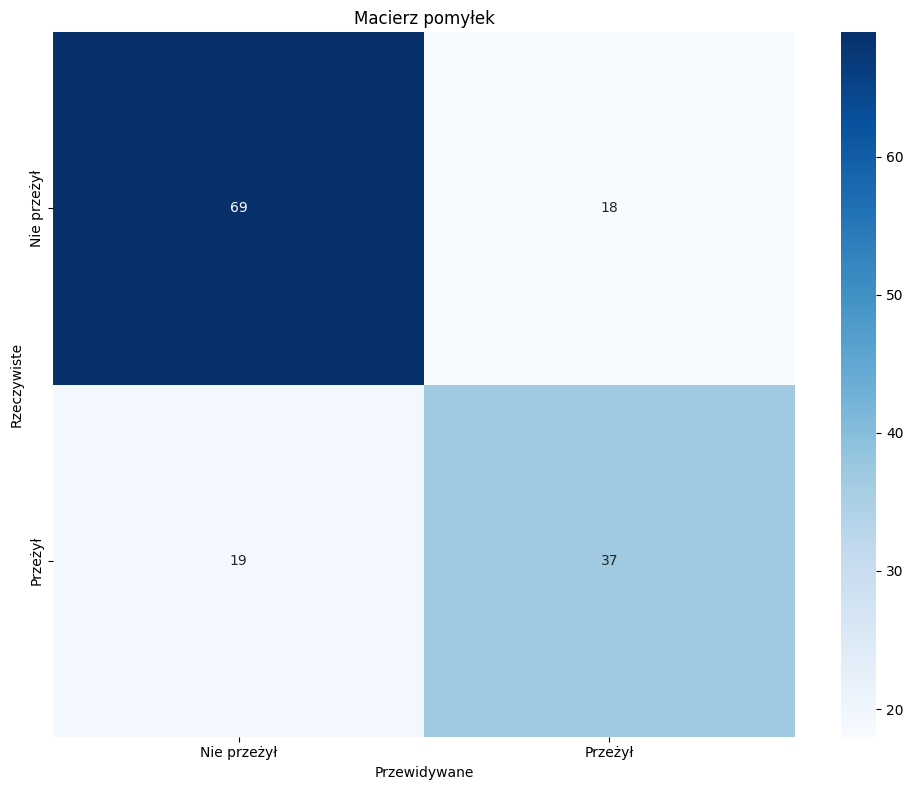

In [ ]:
# Sekcja 8: Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Nie przeżył', 'Przeżył'],
            yticklabels=['Nie przeżył', 'Przeżył'])
plt.title('Macierz pomyłek')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.tight_layout()
plt.show()

In [ ]:
# Sekcja 9: Interaktywne prognozowanie
while True:
    print("\nPrognoza przeżycia dla nowego pasażera")
    print("(Wpisz 'koniec' aby zakończyć)")

    try:
        sex_input = input("\nPodaj płeć (m/k): ").lower()
        if sex_input == 'koniec':
            break
        sex = 1 if sex_input == 'k' else 0

        pclass_input = input("Podaj klasę (1/2/3): ")
        if pclass_input == 'koniec':
            break
        pclass = int(pclass_input)

        age_input = input("Podaj wiek: ")
        if age_input == 'koniec':
            break
        age = float(age_input)

        print(f"\nPrzedziały cenowe biletów:")
        print(f"0 - Niska: {min_fare:.2f} - {fare_ranges[0]:.2f}")
        print(f"1 - Średnia: {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
        print(f"2 - Wysoka: {fare_ranges[1]:.2f} - {max_fare:.2f}")
        fare_category_input = input("Podaj kategorię cenową (0/1/2): ")
        if fare_category_input == 'koniec':
            break
        fare_category = int(fare_category_input)

        new_passenger = pd.DataFrame({
            'sex': [sex],
            'pclass': [pclass],
            'age': [age],
            'fare_category': [fare_category]
        })

        new_passenger_scaled = scaler.transform(new_passenger)

        prediction = model.predict(new_passenger_scaled)
        probability = model.predict_proba(new_passenger_scaled)

        print("\nWyniki prognozy:")
        print(f"Płeć: {'Kobieta' if sex == 1 else 'Mężczyzna'}")
        print(f"Klasa: {pclass}")
        print(f"Wiek: {age}")
        print(f"Kategoria cenowa: {'Niska' if fare_category == 0 else 'Średnia' if fare_category == 1 else 'Wysoka'}")
        print(f"Przewidywanie przeżycia: {'Tak' if prediction[0] == 1 else 'Nie'}")
        print(f"Prawdopodobieństwo przeżycia: {probability[0][1]:.2%}")

    except ValueError:
        print("\nBłąd: Wprowadź poprawne wartości numeryczne!")
    except Exception as e:
        print(f"\nWystąpił błąd: {e}")

    if input("\nCzy chcesz sprawdzić kolejnego pasażera? (t/n): ").lower() != 't':
        break

print("\nKoniec programu")


Prognoza przeżycia dla nowego pasażera
(Wpisz 'koniec' aby zakończyć)

Podaj płeć (m/k): m
Podaj klasę (1/2/3): 1
Podaj wiek: 45

Przedziały cenowe biletów:
0 - Niska: 0.00 - 170.78
1 - Średnia: 170.78 - 341.55
2 - Wysoka: 341.55 - 512.33
Podaj kategorię cenową (0/1/2): 2

Wyniki prognozy:
Płeć: Mężczyzna
Klasa: 1
Wiek: 45.0
Kategoria cenowa: Wysoka
Przewidywanie przeżycia: Nie
Prawdopodobieństwo przeżycia: 35.78%

Czy chcesz sprawdzić kolejnego pasażera? (t/n): t

Prognoza przeżycia dla nowego pasażera
(Wpisz 'koniec' aby zakończyć)

Podaj płeć (m/k): m
Podaj klasę (1/2/3): 1
Podaj wiek: 10

Przedziały cenowe biletów:
0 - Niska: 0.00 - 170.78
1 - Średnia: 170.78 - 341.55
2 - Wysoka: 341.55 - 512.33
Podaj kategorię cenową (0/1/2): 2

Wyniki prognozy:
Płeć: Mężczyzna
Klasa: 1
Wiek: 10.0
Kategoria cenowa: Wysoka
Przewidywanie przeżycia: Tak
Prawdopodobieństwo przeżycia: 67.68%

Czy chcesz sprawdzić kolejnego pasażera? (t/n): n

Koniec programu
